In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

from sklearn import set_config
set_config(display='diagram')        

seed = 42

In [2]:
df = pd.read_csv('train.csv')
TEST_DF = pd.read_csv('test.csv')

In [3]:
print(df.info())
print()
TEST_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [4]:
X = df.drop(['PassengerId', 'Survived'], axis = 1)
y = df.Survived.to_frame()
TEST_DF = TEST_DF.drop('PassengerId', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed, 
                                                    stratify = y)

In [6]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(TEST_DF.shape)

(668, 10)
(223, 10)
(668, 1)
(223, 1)
(418, 10)


In [8]:
print(X_train.isna().sum())
print()
print(X_test.isna().sum())
print()
print(TEST_DF.isna().sum())

Pclass        0
Name          0
Sex           0
Age         131
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       522
Embarked      2
dtype: int64

Pclass        0
Name          0
Sex           0
Age          46
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       165
Embarked      0
dtype: int64

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


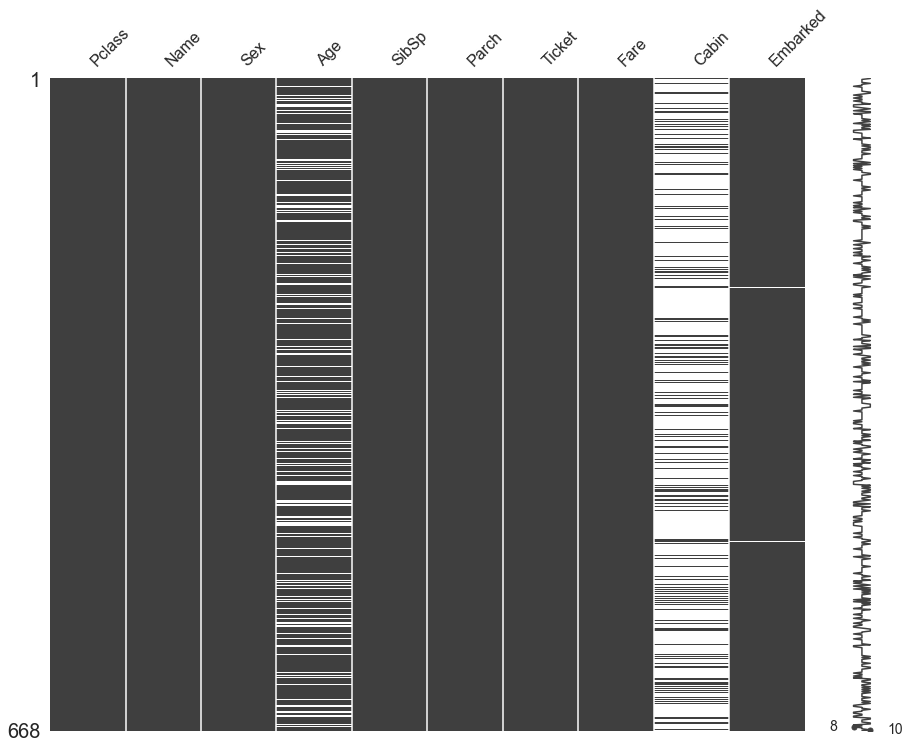

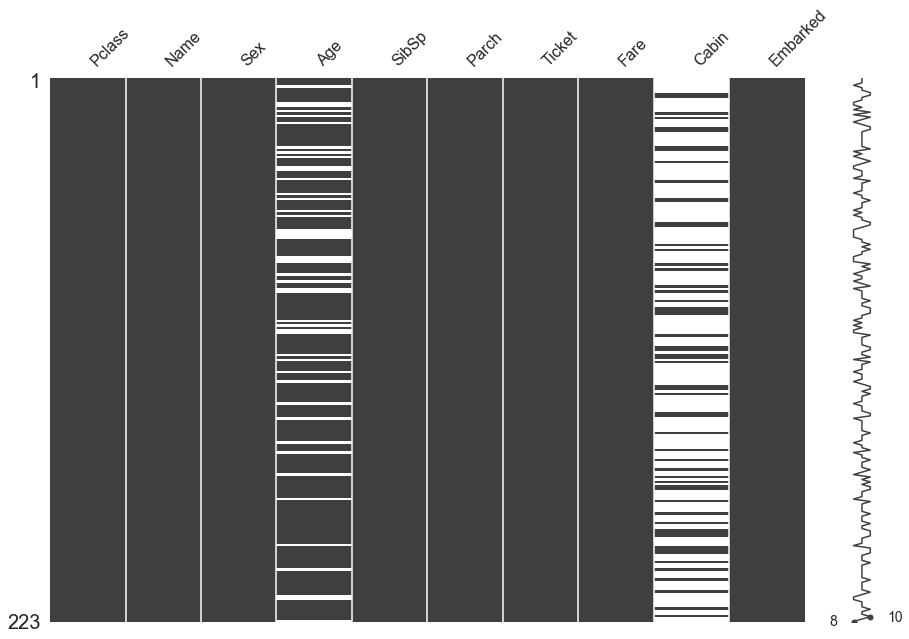

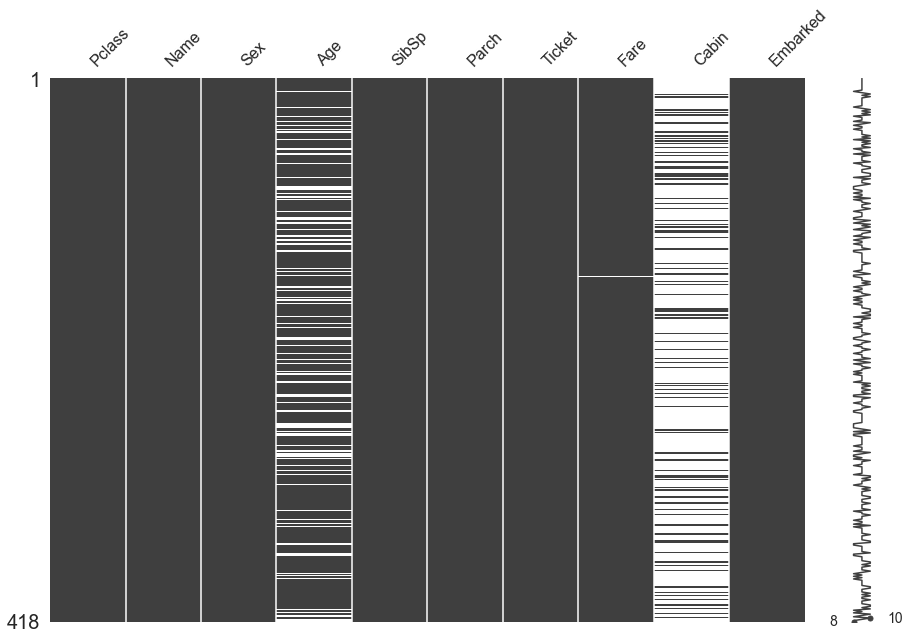

In [9]:
import missingno as msno
msno.matrix(X_train, figsize = (15,12));
msno.matrix(X_test, figsize = (15,10));
msno.matrix(TEST_DF, figsize = (15,10));

# EDA & Feature Engineering

In [10]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.00,1,0,19943,90.0000,C93,S
1,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S
2,2,"Gillespie, Mr. William Henry",male,34.00,0,0,12233,13.0000,NaN,S
3,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
4,2,"Rugg, Miss. Emily",female,21.00,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...
663,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
664,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
665,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.00,1,3,W./C. 6608,34.3750,NaN,S
666,1,"Gee, Mr. Arthur H",male,47.00,0,0,111320,38.5000,E63,S


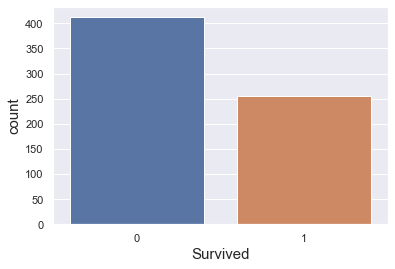

In [11]:
sns.countplot(y_train.Survived);

In [12]:
y_train.Survived.value_counts(normalize = True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

The target variable is imbalanced, where the positive class is the minority (38 %).

In [13]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

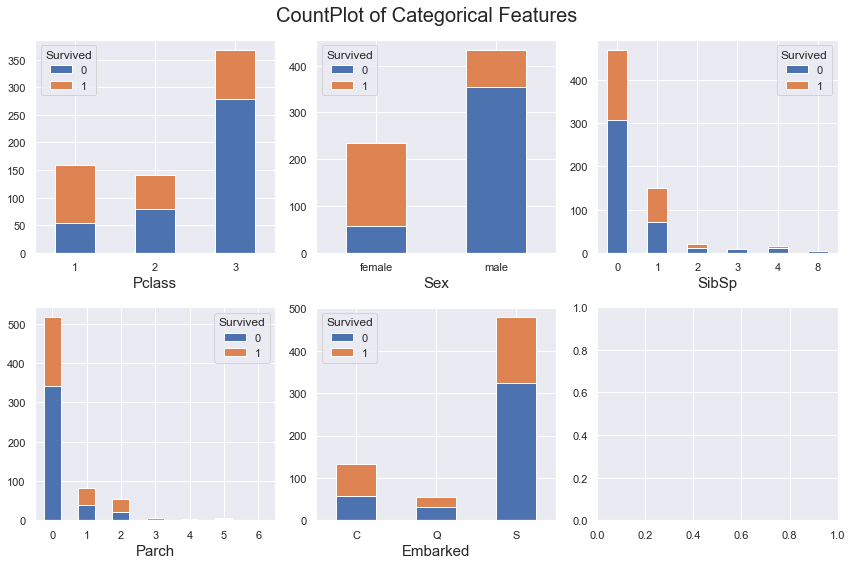

In [14]:
fig, axes = plt.subplots(2,3, figsize = (12,8))

for col, ax in zip(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axes.flatten()):
    pd.crosstab(index = X_train[col], columns = y_train['Survived']).\
    plot(kind = 'bar', stacked = True, rot = 0, ax = ax);
plt.suptitle('CountPlot of Categorical Features', fontsize = 20);  
plt.tight_layout()

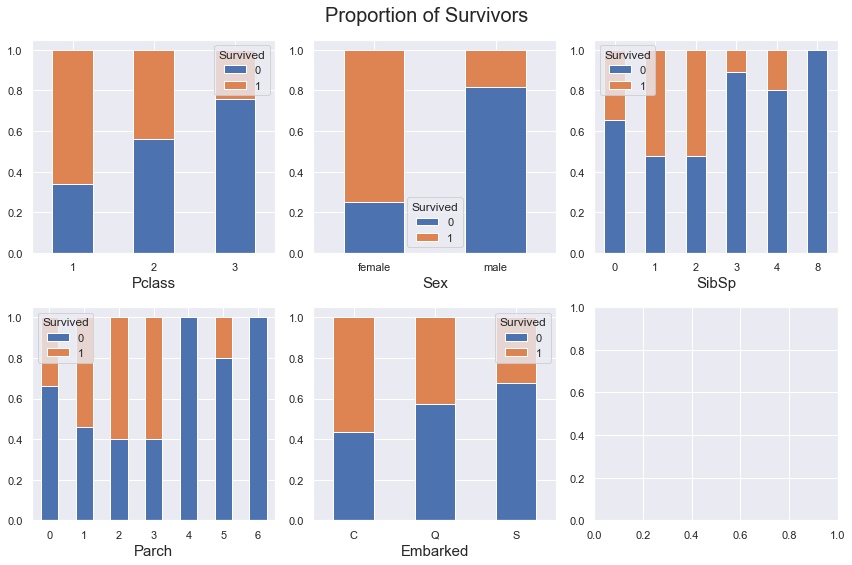

In [15]:
#proportion
prop = lambda x: x/np.sum(x)

fig, axes = plt.subplots(2,3, figsize = (12,8))

for col, ax in zip(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axes.flatten()):
    pd.crosstab(index = X_train[col], columns = y_train['Survived']).apply(prop, axis = 1).\
                                        plot(kind = 'bar', stacked = True, rot = 0,  ax = ax);
plt.suptitle('Proportion of Survivors', fontsize = 20);  
plt.tight_layout()

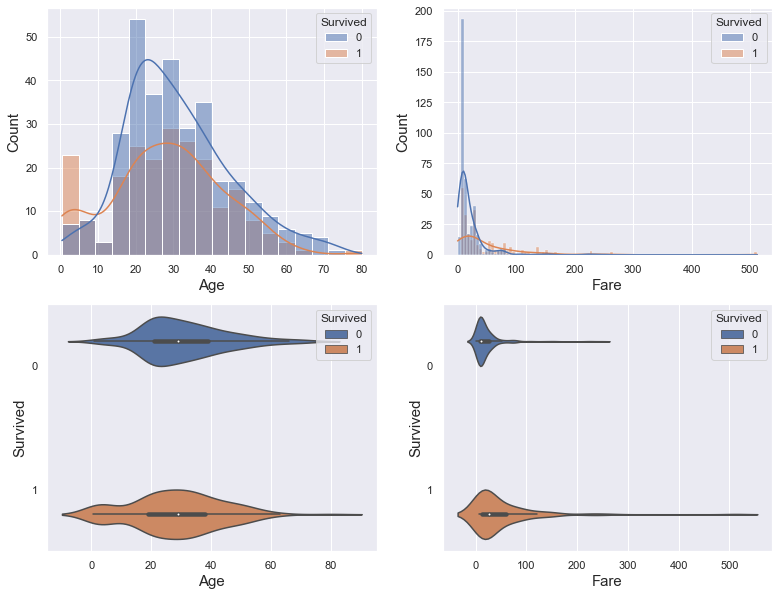

In [16]:
fig, ax = plt.subplots(2,2, figsize = (13,10))

sns.histplot(x = 'Age', data = pd.concat([X_train, y_train], axis = 1),  hue = 'Survived', kde = True, 
             ax = ax[0][0]);

sns.histplot(x = 'Fare', data = pd.concat([X_train, y_train], axis = 1),  hue = 'Survived', kde = True, 
             ax = ax[0][1]);


sns.violinplot(x = 'Age', y = 'Survived', data = pd.concat([X_train, y_train], axis = 1), hue = 'Survived',
               orient = 'h', ax=ax[1][0]);

sns.violinplot(x = 'Fare', y = 'Survived', data = pd.concat([X_train, y_train], axis = 1), hue = 'Survived',
               orient = 'h', ax=ax[1][1]);

# Feature Engineering

#### Family size by combining both Sibsp and Parch features

In [17]:
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1

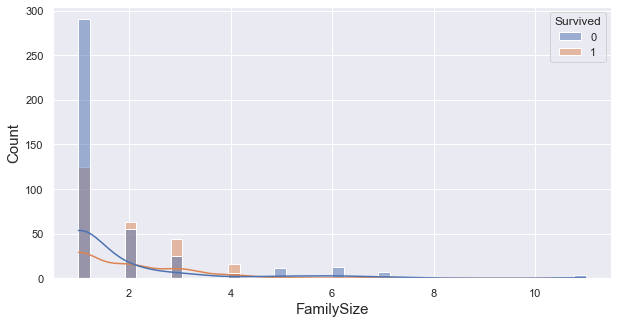

In [18]:
plt.figure(figsize = (10,5))
sns.histplot(data = pd.concat([X_train['FamilySize'], y_train], axis = 1), 
            x = 'FamilySize', 
            hue = 'Survived',
            kde = True);

In [19]:
X_train['IsAlone'] = np.select(condlist = [X_train['FamilySize'] > 1, 
                                           X_train['FamilySize'] == 1], 
                               choicelist = [0, 1])

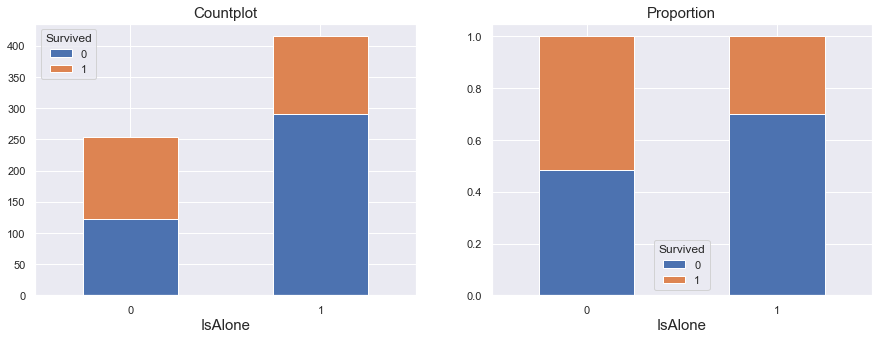

In [20]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

pd.crosstab(index = X_train['IsAlone'], columns = y_train.Survived).\
plot(kind = 'bar',stacked = True,  rot = 0, title = 'Countplot', ax = ax[0]);

pd.crosstab(index = X_train['IsAlone'], columns = y_train.Survived).apply(prop, axis = 1).\
  plot(kind = 'bar', stacked = True,  rot = 0, title = 'Proportion', ax = ax[1]);

In [21]:
%%time
#Applying to validation and tet sets
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1
TEST_DF['FamilySize'] = TEST_DF['SibSp'] + TEST_DF['Parch'] + 1


X_test['IsAlone'] = np.select(condlist = [X_test['FamilySize'] > 1, X_test['FamilySize'] == 1], 
                               choicelist = [0, 1])

TEST_DF['IsAlone'] = np.select(condlist = [TEST_DF['FamilySize'] > 1,  TEST_DF['FamilySize'] == 1], 
                               choicelist = [0, 1])

#dropping columns
X_train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
X_test.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
TEST_DF.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

Wall time: 7.98 ms


In [22]:
X_train.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
X_test.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
TEST_DF.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)

In [23]:
X_train['Title'] = [X_train.Name[i].split(', ')[1].split('.')[0] for i in range(len(X_train))]
X_test['Title'] = [X_test.Name[i].split(', ')[1].split('.')[0] for i in range(len(X_test))]
TEST_DF['Title'] = [TEST_DF.Name[i].split(', ')[1].split('.')[0] for i in range(len(TEST_DF))]

In [24]:
X_train.drop('Name', axis = 1, inplace = True)
X_test.drop('Name', axis = 1, inplace = True)
TEST_DF.drop('Name', axis = 1, inplace = True)

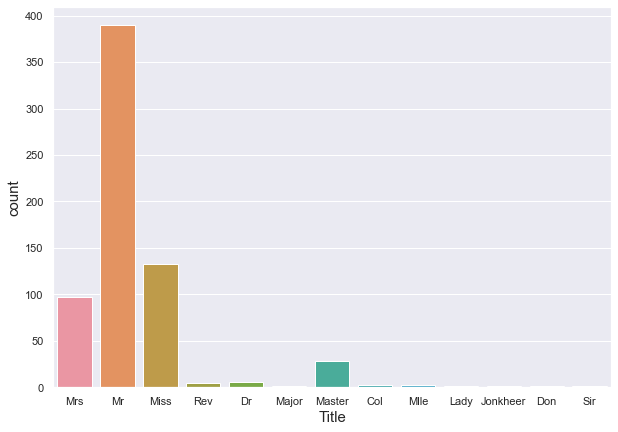

In [25]:
plt.figure(figsize = (10,7))
sns.countplot(X_train.Title);

In [26]:
#For Female less fequent titles

X_train['Title'] = X_train['Title'].\
replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')

X_test['Title'] = X_test['Title'].\
replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')

TEST_DF['Title'] = TEST_DF['Title'].\
replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')

#for male less frequent title
X_train['Title'] = X_train['Title'].\
replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

X_test['Title'] = X_test['Title'].\
replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

TEST_DF['Title'] = TEST_DF['Title'].\
replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

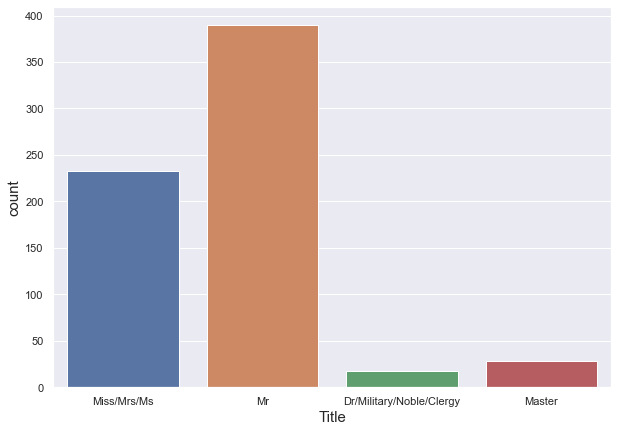

In [27]:
plt.figure(figsize = (10,7))
sns.countplot(X_train.Title);

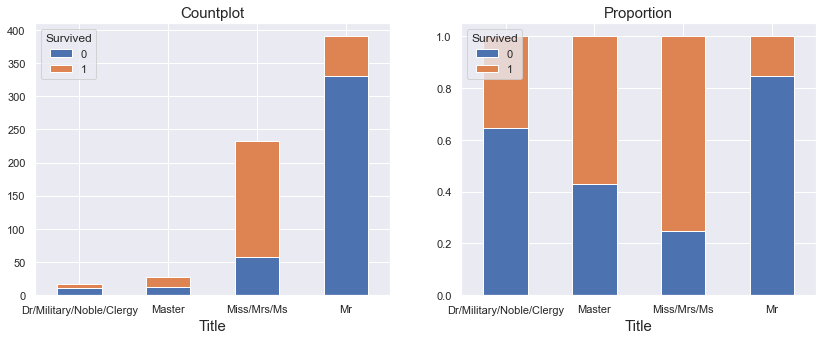

In [28]:
fig, ax = plt.subplots(1,2, figsize = (14,5))

pd.crosstab(index = X_train['Title'], columns = y_train['Survived']).\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Countplot', ax = ax[0]);

pd.crosstab(index = X_train['Title'], columns = y_train['Survived']).apply(prop, axis = 1).\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Proportion', ax = ax[1]);

In [29]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')

In [30]:
encode_col = ['Pclass', 'IsAlone']

for col in encode_col:
    X_train[col] = X_train[col].astype('object')
    X_test[col] = X_test[col].astype('object')
    TEST_DF[col] = TEST_DF[col].astype('object')

In [31]:
from feature_engine.encoding import WoEEncoder
    
woe_enc = WoEEncoder(variables=['Pclass', 'Sex', 'IsAlone', 'Title'])

woe_enc.fit(X_train, y_train.Survived)

X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)
TEST_DF = woe_enc.transform(TEST_DF)

print(woe_enc.encoder_dict_)

{'Pclass': {1: 1.140822208463213, 2: 0.23353243744803398, 3: -0.6667295072192619}, 'Sex': {'female': 1.5858868893616964, 'male': -1.0114243735899289}, 'IsAlone': {0: 0.5470221833378589, 1: -0.3657212808082547}, 'Title': {'Dr/Military/Noble/Clergy': -0.13028989870035154, 'Master': 0.7635279773217449, 'Miss/Mrs/Ms': 1.5801888682470586, 'Mr': -1.2487350266013795}}


In [32]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1.140822,1.585887,35.00,90.0000,S,2,0.547022,1.580189
1,0.233532,-1.011424,19.00,10.5000,S,1,-0.365721,-1.248735
2,0.233532,-1.011424,34.00,13.0000,S,1,-0.365721,-1.248735
3,-0.666730,1.585887,4.00,22.0250,S,3,0.547022,1.580189
4,0.233532,1.585887,21.00,10.5000,S,1,-0.365721,1.580189
...,...,...,...,...,...,...,...,...
663,0.233532,-1.011424,NaN,13.8625,C,1,-0.365721,-1.248735
664,-0.666730,1.585887,0.75,19.2583,C,4,0.547022,1.580189
665,-0.666730,1.585887,48.00,34.3750,S,5,0.547022,1.580189
666,1.140822,-1.011424,47.00,38.5000,S,1,-0.365721,-1.248735


In [33]:
X_train['Embarked'] = X_train['Embarked'].map({'Q':0, 'C':1, 'S':2})
X_test['Embarked'] = X_test['Embarked'].map({'Q':0, 'C':1, 'S':2})
TEST_DF['Embarked'] = TEST_DF['Embarked'].map({'Q':0, 'C':1, 'S':2})

In [34]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1.140822,1.585887,35.00,90.0000,2.0,2,0.547022,1.580189
1,0.233532,-1.011424,19.00,10.5000,2.0,1,-0.365721,-1.248735
2,0.233532,-1.011424,34.00,13.0000,2.0,1,-0.365721,-1.248735
3,-0.666730,1.585887,4.00,22.0250,2.0,3,0.547022,1.580189
4,0.233532,1.585887,21.00,10.5000,2.0,1,-0.365721,1.580189
...,...,...,...,...,...,...,...,...
663,0.233532,-1.011424,NaN,13.8625,1.0,1,-0.365721,-1.248735
664,-0.666730,1.585887,0.75,19.2583,1.0,4,0.547022,1.580189
665,-0.666730,1.585887,48.00,34.3750,2.0,5,0.547022,1.580189
666,1.140822,-1.011424,47.00,38.5000,2.0,1,-0.365721,-1.248735


In [35]:
from missingpy import MissForest
imputer = MissForest(random_state = seed)

imputer.fit(X_train, cat_vars=[0,1,4,6,7])

X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_train.columns)
TEST_DF = pd.DataFrame(imputer.transform(TEST_DF), columns = X_train.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [36]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1.140822,1.585887,35.000000,90.0000,2.0,2.0,0.547022,1.580189
1,0.233532,-1.011424,19.000000,10.5000,2.0,1.0,-0.365721,-1.248735
2,0.233532,-1.011424,34.000000,13.0000,2.0,1.0,-0.365721,-1.248735
3,-0.666730,1.585887,4.000000,22.0250,2.0,3.0,0.547022,1.580189
4,0.233532,1.585887,21.000000,10.5000,2.0,1.0,-0.365721,1.580189
...,...,...,...,...,...,...,...,...
663,0.233532,-1.011424,38.371619,13.8625,1.0,1.0,-0.365721,-1.248735
664,-0.666730,1.585887,0.750000,19.2583,1.0,4.0,0.547022,1.580189
665,-0.666730,1.585887,48.000000,34.3750,2.0,5.0,0.547022,1.580189
666,1.140822,-1.011424,47.000000,38.5000,2.0,1.0,-0.365721,-1.248735


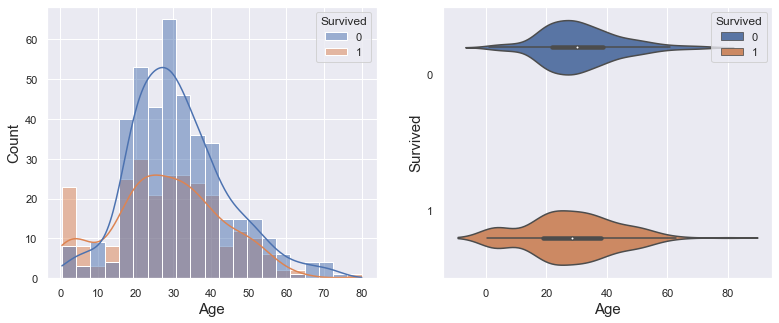

In [37]:
fig, ax = plt.subplots(1,2, figsize = (13,5))

sns.histplot(x = 'Age', data = pd.concat([X_train, y_train], axis = 1),  hue = 'Survived', kde = True, 
             ax = ax[0]);

sns.violinplot(x = 'Age', y = 'Survived', data = pd.concat([X_train, y_train], axis = 1), hue = 'Survived',
               orient = 'h', ax=ax[1]);

In [38]:
print(X_train.isna().sum())
print()
print(X_test.isna().sum())
print()
print(TEST_DF.isna().sum())

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


In [39]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,1.140822,1.585887,35.000000,90.0000,2.0,2.0,0.547022,1.580189
1,0.233532,-1.011424,19.000000,10.5000,2.0,1.0,-0.365721,-1.248735
2,0.233532,-1.011424,34.000000,13.0000,2.0,1.0,-0.365721,-1.248735
3,-0.666730,1.585887,4.000000,22.0250,2.0,3.0,0.547022,1.580189
4,0.233532,1.585887,21.000000,10.5000,2.0,1.0,-0.365721,1.580189
...,...,...,...,...,...,...,...,...
663,0.233532,-1.011424,38.371619,13.8625,1.0,1.0,-0.365721,-1.248735
664,-0.666730,1.585887,0.750000,19.2583,1.0,4.0,0.547022,1.580189
665,-0.666730,1.585887,48.000000,34.3750,2.0,5.0,0.547022,1.580189
666,1.140822,-1.011424,47.000000,38.5000,2.0,1.0,-0.365721,-1.248735


In [40]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

efd = EqualFrequencyDiscretiser(12)

X_train['age_bin'] = efd.fit_transform(X_train.Age.to_frame())
X_test['age_bin'] = efd.transform(X_test.Age.to_frame())
TEST_DF['age_bin'] = efd.transform(TEST_DF.Age.to_frame())

print(efd.binner_dict_)

{'Age': [-inf, 12.583333333333329, 19.0, 21.0, 24.0, 26.99333333333333, 29.0, 32.0, 35.0, 38.09290476190476, 42.83922222222215, 50.0, inf]}


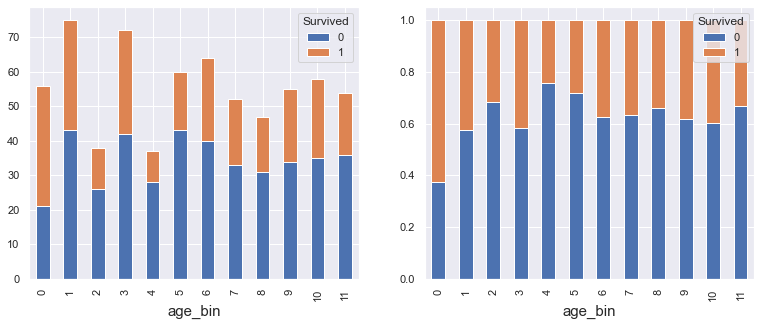

In [41]:
fig, ax = plt.subplots(1,2, figsize = (13,5))

pd.crosstab(index = X_train['age_bin'], columns = y_train.Survived).\
plot(kind = 'bar', stacked = True, ax = ax[0]);

pd.crosstab(index = X_train['age_bin'], columns = y_train.Survived).apply(prop, axis = 1).\
plot(kind = 'bar', stacked = True, ax = ax[1]);

In [42]:
efd = EqualFrequencyDiscretiser(12)

X_train['fare_bin'] = efd.fit_transform(X_train.Fare.to_frame())
X_test['fare_bin'] = efd.transform(X_test.Fare.to_frame())
TEST_DF['fare_bin'] = efd.transform(TEST_DF.Fare.to_frame())

print(efd.binner_dict_)

{'Fare': [-inf, 7.241333333333333, 7.775, 7.8958, 8.205533333333332, 10.5, 13.8604, 20.2125, 26.0, 30.5, 52.0, 79.65, inf]}


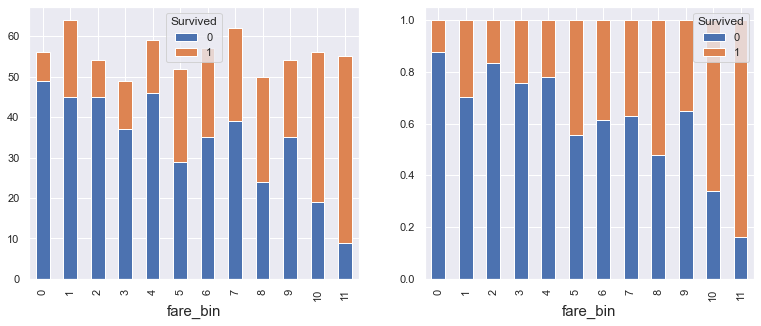

In [43]:
fig, ax = plt.subplots(1,2, figsize = (13,5))

pd.crosstab(index = X_train['fare_bin'], columns = y_train.Survived).\
plot(kind = 'bar', stacked = True, ax = ax[0]);

pd.crosstab(index = X_train['fare_bin'], columns = y_train.Survived).apply(prop, axis = 1).\
plot(kind = 'bar', stacked = True, ax = ax[1]);

In [44]:
X_train['Embarked'] = X_train['Embarked'].astype('object')
X_test['Embarked'] = X_test['Embarked'].astype('object')
TEST_DF['Embarked'] = TEST_DF['Embarked'].astype('object')

X_train['fare_bin'] = X_train['fare_bin'].astype('object')
X_test['fare_bin'] = X_test['fare_bin'].astype('object')
TEST_DF['fare_bin'] = TEST_DF['fare_bin'].astype('object')

X_train['age_bin'] = X_train['age_bin'].astype('object')
X_test['age_bin'] = X_test['age_bin'].astype('object')
TEST_DF['age_bin'] = TEST_DF['age_bin'].astype('object')

In [45]:
woe_enc = WoEEncoder(variables=['Embarked', 'age_bin', 'fare_bin'])

woe_enc.fit(X_train, y_train.Survived)

X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)
TEST_DF = woe_enc.transform(TEST_DF)

print(woe_enc.encoder_dict_)

{'Embarked': {0.0: 0.17735291631396738, 1.0: 0.7592083161772284, 2.0: -0.2519504111031555}, 'age_bin': {0: 0.9866715286359548, 1: 0.18038169197612813, 2: -0.2973439833635178, 3: 0.13937366824875094, 4: -0.6591340279690205, 5: -0.45214086676738247, 6: -0.0349797188960267, 7: -0.07622267743007595, 8: -0.18555257737540104, 9: -0.005992182022774486, 10: 0.05599205930969989, 11: -0.2173012756899814}, 'fare_bin': {0: -1.4700642441853495, 1: -0.3863776057339153, 2: -1.1335920075641364, 3: -0.6501653579862603, 4: -0.7878461341575944, 5: 0.2440442908126396, 6: 0.011540296738865937, 7: -0.05222152533053281, 8: 0.5558886125435003, 9: -0.13506317745300936, 10: 1.1423248383477478, 11: 2.1072627240228394}}


In [46]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,age_bin,fare_bin
0,1.140822,1.585887,35.000000,90.0000,-0.251950,2.0,0.547022,1.580189,-0.076223,2.107263
1,0.233532,-1.011424,19.000000,10.5000,-0.251950,1.0,-0.365721,-1.248735,0.180382,-0.787846
2,0.233532,-1.011424,34.000000,13.0000,-0.251950,1.0,-0.365721,-1.248735,-0.076223,0.244044
3,-0.666730,1.585887,4.000000,22.0250,-0.251950,3.0,0.547022,1.580189,0.986672,-0.052222
4,0.233532,1.585887,21.000000,10.5000,-0.251950,1.0,-0.365721,1.580189,-0.297344,-0.787846
...,...,...,...,...,...,...,...,...,...,...
663,0.233532,-1.011424,38.371619,13.8625,0.759208,1.0,-0.365721,-1.248735,-0.005992,0.011540
664,-0.666730,1.585887,0.750000,19.2583,0.759208,4.0,0.547022,1.580189,0.986672,0.011540
665,-0.666730,1.585887,48.000000,34.3750,-0.251950,5.0,0.547022,1.580189,0.055992,-0.135063
666,1.140822,-1.011424,47.000000,38.5000,-0.251950,1.0,-0.365721,-1.248735,0.055992,-0.135063


In [47]:
print(X_train.isna().sum())
print()
print(X_test.isna().sum())
print()
print(TEST_DF.isna().sum())

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
age_bin       0
fare_bin      0
dtype: int64

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
age_bin       0
fare_bin      0
dtype: int64

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
age_bin       0
fare_bin      0
dtype: int64


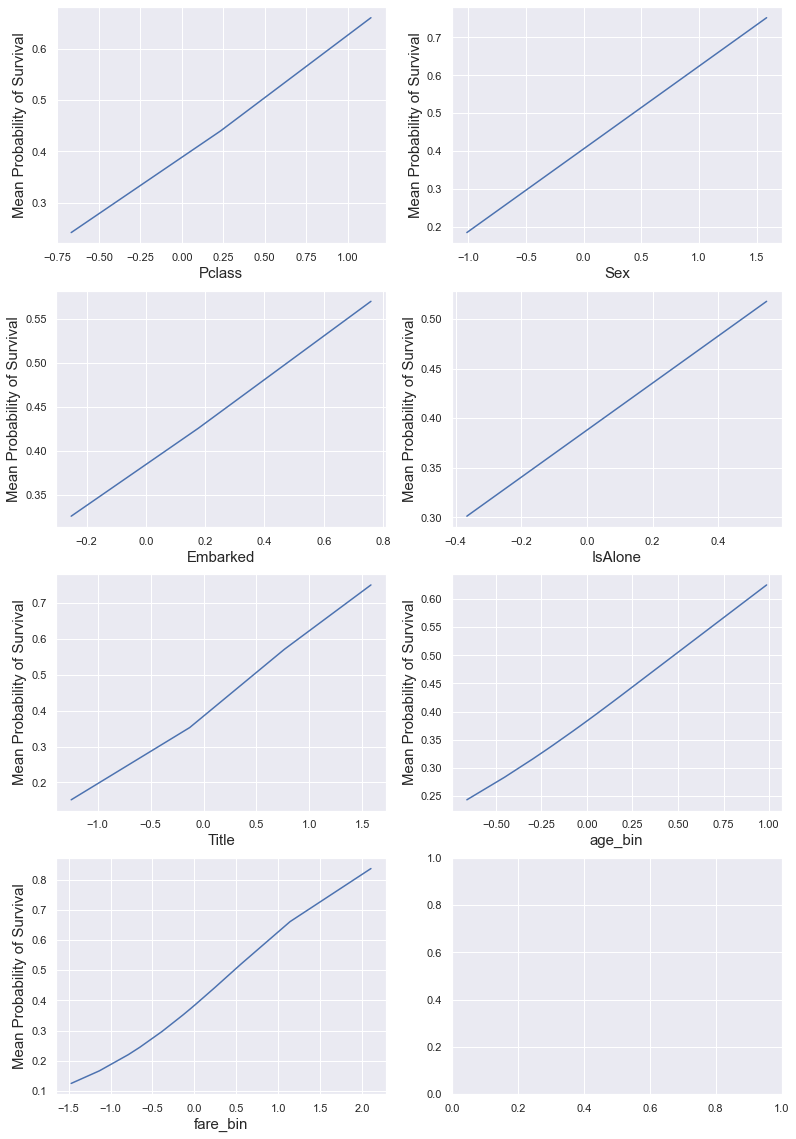

In [48]:
cat_cols = ['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Title', 'age_bin', 'fare_bin']

fig, axes = plt.subplots(4,2, figsize = (13,20))

for col, ax in zip(cat_cols, axes.flatten()):
    pd.concat([X_train, y_train],axis = 1).groupby(col).mean()['Survived'].plot(ax = ax);
    ax.set_ylabel('Mean Probability of Survival')

In [49]:
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
TEST_DF.to_csv('TEST_DF.csv', index = False)

y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)